# EDA : Exploratory Data Analysis

In [4]:
import kafka
import json
import csv
import numpy as np
from time import *
from kafka import KafkaProducer
from kafka import KafkaConsumer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Nous avons un dataset où des capteurs IOT sont relier à des patients d'un hopital dans le cadre de détection des maladies cardiaques. 
Nous avons la valuer 'Target' du Dataset qui à une valeur 1 si un maladie à été détecté ou 0 si non. 

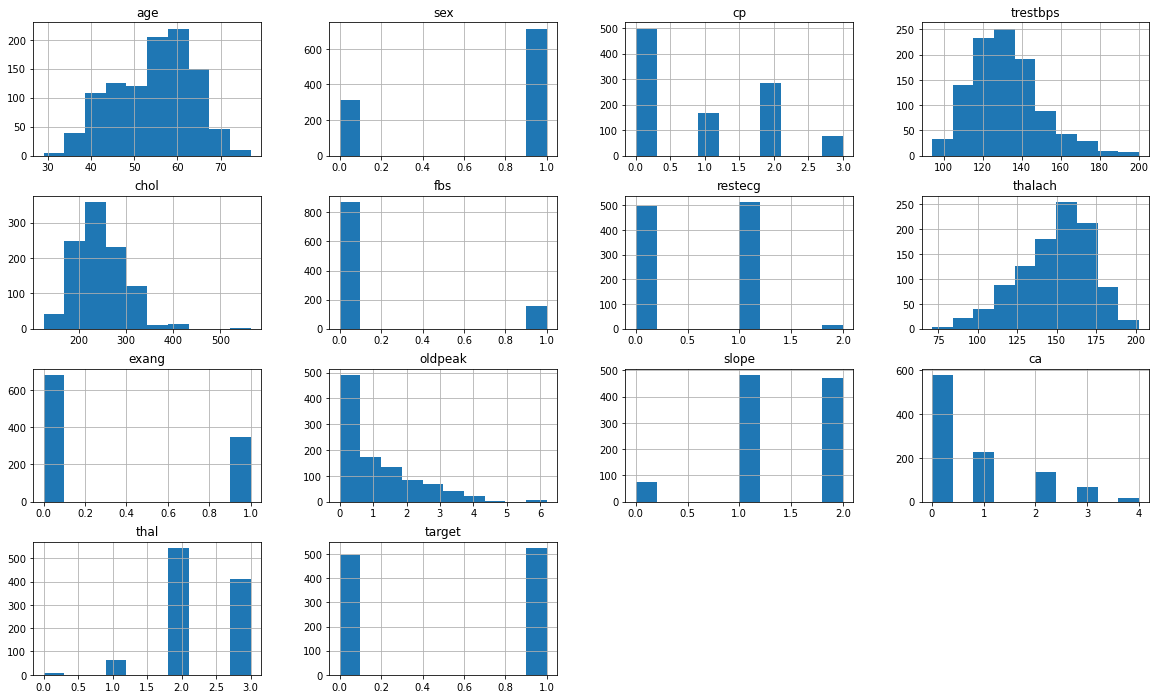

In [18]:
df = pd.read_csv('heart.csv')
df.hist()
plt.rcParams["figure.figsize"] = (20,12)
plt.show()

# Les données du dataset sont organisés comme suit :
#### age : l'age du patient
#### sex : 0 pour femme - 1 pour homme
#### cp : Chest Pain Type 4 values : 1-typical angina; 2-atypical angina - 3-non-anginal pain; 4-asymptomatic
#### TrestBPs : Blood pressur at rest at admission
#### Chol: Cholesterol mg/dl
#### FBS : (fasting blood sugar >  120 mg/dl) (1 = true; 0 = false)
#### resteCG : resting electrocardiographic results 0-normal, 1-having ST-T, 2-hypertrophy
#### thalach: maximum heart rate achieved
#### exang : exercise induced angina (1 = yes; 0 = no)
#### oldpeak: ST depression induced by exercise relative to rest
#### slop : the slope of the peak exercise ST segment
#### ca 0-3: vessels number of major vessels colored by flourosopy
#### thal : 1 = normal; 2 = fixed defect; 3 = reversable defect
#### target:  0 Diagnotiqué Non Malade 1 Diagnostiqué Malade



# Vérifions la corrélation des variables. 

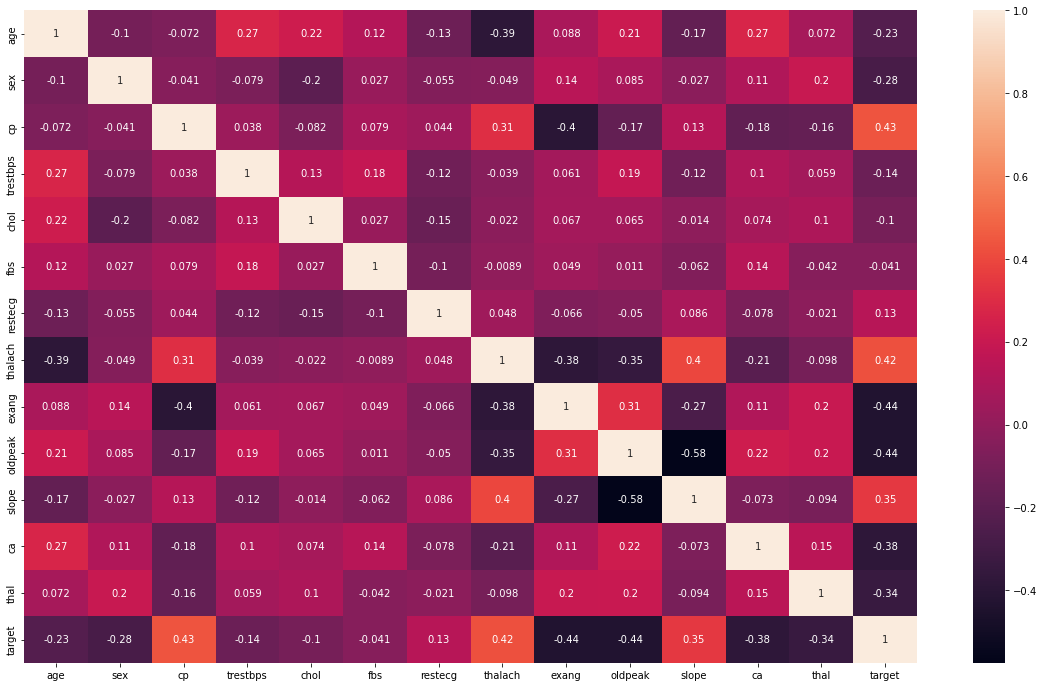

In [7]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Nous remarquons que les variables ne sont pas très fortement corrélés ce qui nous permet de déduire que toutes les features sont importantes pour diagnostiqué la maladie

In [25]:
mouch_lebes = df[df['target']==1]
print('Statistiques descriptifs des patients diagnostiqués malade')
mouch_lebes.describe()

Statistiques descriptifs des patients diagnostiqués malade


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.0
mean,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772,1.0
std,9.631804,0.495498,0.945881,16.112188,53.010345,0.342029,0.502109,19.096928,0.342029,0.771079,0.590295,0.871462,0.468949,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.500000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,265.750000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [27]:
lebes = df[df['target']==0]
print('Statistiques descriptifs des patients diagnostiqués Non-malade')
lebes.describe()

Statistiques descriptifs des patients diagnostiqués Non-malade


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.0
mean,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078,0.0
std,7.908153,0.378059,0.908024,18.576736,49.558924,0.370945,0.544825,22.565235,0.498083,1.290956,0.568932,1.032108,0.685460,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.000000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.000000,284.000000,0.000000,1.000000,156.000000,1.000000,2.500000,2.000000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [28]:
df.shape

(1025, 14)

Nous avons donc un classification équilibré sur 1025 entrée nous avons 526 patient diagnostiqués malade et 499 patients dignostiqués non-malade

In [12]:
lebes.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.0
mean,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078,0.0
std,7.908153,0.378059,0.908024,18.576736,49.558924,0.370945,0.544825,22.565235,0.498083,1.290956,0.568932,1.032108,0.685460,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.000000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.000000,284.000000,0.000000,1.000000,156.000000,1.000000,2.500000,2.000000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


Regardons maintenant la corrélation des chaques features par rapport à la détection de la malade pour décider d'un filtre pour notre message broker.
Ne remettant pas en cause le diagnostique de maladie positive des médecins, nous allons décider grâce aux features qui sont le plus probable de correspondre 
à une personne malade et appliquer un filtre de surveillance sur les non malades qui possèdent des symptomes similaires au diagnostiqués malades.

### Correlations des features avec la maladie en valeur absolue

In [30]:
print(df.corr()['target'][:-1].apply(np.abs).sort_values(ascending = False))


Correlations des features avec la maladie en valeur absolue
 
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


### Correlations des features les plus corrélés avec le diagnostique

In [32]:
df.corr()['target'].loc[['oldpeak', 'exang','cp','thalach','ca','slope']].sort_values()

oldpeak   -0.438441
exang     -0.438029
ca        -0.382085
slope      0.345512
thalach    0.422895
cp         0.434854
Name: target, dtype: float64

La corrélation négative veut dire plus la valeur est basse, plus le patient à de chance d'être malade.

La corrélation positive veut dire plus la valeur est haute, plus le patient à de chance d'être malade.


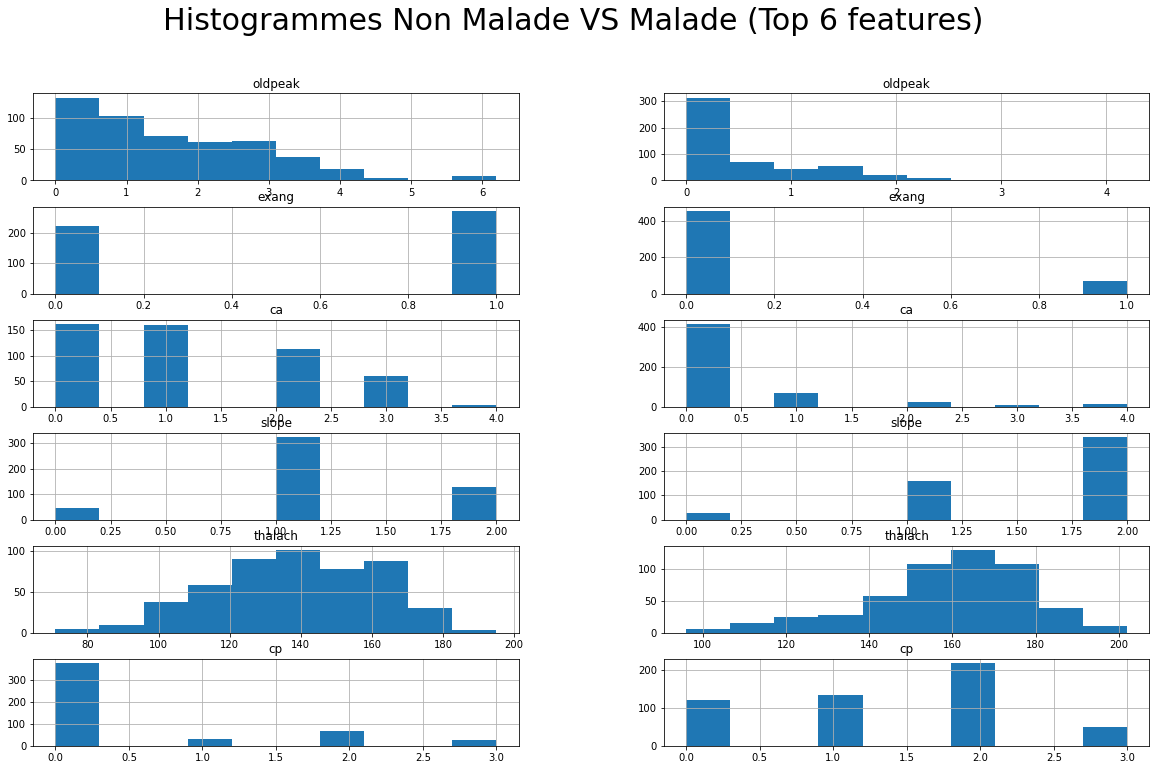

In [33]:
mylist = ['oldpeak','exang','ca','slope','thalach','cp']
fig,ax = plt.subplots(6,2)
ax1 = ax[:,0]
ax2 = ax[:,1]
lebes[mylist].hist(ax=ax1)
mouch_lebes[mylist].hist(ax = ax2)
plt.rcParams["figure.figsize"] = (20,12)
plt.suptitle('Histogrammes Non Malade VS Malade (Top 6 features)', fontsize = 30)
plt.show()

## Suite à ces figures voici les filtres que l'on va appliquer au donnés des Non Malade pour le catégorisé sous surveillance. 
### oldspeak, exang et ca = 0 : les malades on tendance d'avoir un valeur 0 pour ces features 
### slope = 2 : Les malades ont majoritaire une valeur 2 ce qui peut être inquiétant pour un non malade
### thalach >= 160 , les non-malades avec un maximum heart rate supérieur à 160 sont rares chez les non-malades. A surveiller.
### la distribution CP est trop uniforme pour pouvoir décider d'une valeur


In [38]:
Surveillance = df[(df.oldpeak ==0)&(df.exang ==0)&(df.ca==0)&(df.slope ==2) & (df.thalach>=160)]

In [39]:
Surveillance.shape

(119, 14)

### On voit donc que sur 1000 entrée on a 119 patients non malades à surveiller.
### On aura donc 3 topics : 
### - Un pour les diagnostiqués malade qui devront être surveillé par les urgences.
### - Un pour les non malades à surveillé qui auront besoins de test supplémentaire. 
### - Un pour les non malades qui peuvent rentrés chez eux.